# Training Model Basics
In this Notebook we will learn how to build a Neural Network model, train it and evaluate its performance. We will build a model to be used on the Mnist dataset, which is composed of handwritten digits. The task is to classify each digit 0, 1, 2, ... 9.

### Data Load

In [1]:
import os
import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

tf.keras.backend.clear_session() 

# Seed the kernel for reproductibility
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

# Mnist data load
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### HyperPrameter definition
Standard hyperparameters to be used:
- epochs: Number of times to iterate over the training data arrays.
- batch_size: In gradient descent-like algorithms, this is the number of samples per gradient update. Can be set to 1 to online learning 


In [2]:
batch_size = 128
epochs = 20


num_classes = 10

# Image dimensions
img_rows, img_cols = 28, 28

### Data reshape
Mnist dataset consist in hadwritten digit images. So, each data istance is an image, composed of pixels (numbers from 0 to 255): 

<img src="../data/8-gif.gif">

Foe a general image, its dimensions are $rows\times columns\times channels$. In our case every image is greyscaled, but colored images can have more channels (3 on RGB)

Images can be seen as tensors, and they have a TensorFlow standard format: $rows\times columns\times channels$, while, for example in Theano it is different ($channels \times rows\times columns$). Thus, in order to make use of images in such way, we have to reshape our data:

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
len (x_train), len (x_train[0]), len (x_train[0][0])

(60000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

We add another dimension to the known $ rows\times columns \times channels $: the number of instances.

In [6]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


input_shape = (img_rows, img_cols, 1)
input_shape_extend =  (None, ) + input_shape
print(input_shape, input_shape_extend)

(28, 28, 1) (None, 28, 28, 1)


Neural Networks ussually perform better on scaled images. 
<font color=red><b>Scale the images </font>
<br>We also need the target variable on the standard sci-kit one hot format.


<br><font color=red><b> Transform the target variables to categorical one-hot encoding
<br>Hint: use the function  keras.utils.to_categorical on the train and test targets </b>
</font>

In [7]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
# normalization
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


from tensorflow import keras
# scikit learn target standard style
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [9]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Model construction

We will use Keras to build Neural Net models in order to predict our target. We will cover two ways to build the models, which I named Sequential and Functorial:

### 1.- Sequential style

Layers are added sequentially, as modules. The Sequential model is a linear stack of layers:
- First of all, we have to define the model as sequential:

- Then we can add more layers, like this:

- <b>Remark:</b> for the first layer, one of the parameters must be the input or batch size. So, the first layer added can be something like this

- Then we can add more and more layers:

- A common strategy on image models is to add some Fully connected layers at the end. Even it it is just one, images must be flattened so that predictions fit the required dimension. So, it is needed to add a Flatten() layer:


- Finally, the last layer must match the dimensions of our target variable

#### 1.1.- Model building


<font color=red><b> Build a sequential-like model using this arquitecture:
<br> - Dense layer with 24 units and a relu activation function <b> before the flattenning</b> Probably it has no sense to add a Dense layer to an image-like input. Instead a convolutional layer would probably be a lot better. 
<br> - Flattenning layer
<br> - Dense layer with the output-expected units and a softmax activation function
<br>Hint: use the imported layers </b>
</font>


In [10]:
#building model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Dense(24, activation='relu', input_shape = input_shape))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

#### 1.2.- Compilation
In order to work, the model has to be compiled. In compilation we add the optimizer on which the BackProp will be performed, and the loss function to be used. Additionally, we can add some metrics to control the training

In [11]:

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 28, 24)        48        
_________________________________________________________________
flatten (Flatten)            (None, 18816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                188170    
Total params: 188,218
Trainable params: 188,218
Non-trainable params: 0
_________________________________________________________________


#### 1.3.- Model Training
Finally, the model can be trained. in order to validate the model performances, we can add our test sets to check the metrics on both training and test sets:

In [12]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 57us/sample - loss: 0.4219 - accuracy: 0.8862 - val_loss: 0.2930 - val_accuracy: 0.9159
Epoch 2/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2892 - accuracy: 0.9179 - val_loss: 0.2763 - val_accuracy: 0.9230
Epoch 3/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2744 - accuracy: 0.9229 - val_loss: 0.2701 - val_accuracy: 0.9256
Epoch 4/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2688 - accuracy: 0.9236 - val_loss: 0.2653 - val_accuracy: 0.9261
Epoch 5/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2636 - accuracy: 0.9264 - val_loss: 0.2721 - val_accuracy: 0.9249
Epoch 6/20
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2592 - accuracy: 0.9276 - val_loss: 0.2680 - val_accuracy: 0.9242
Epoch 7/20
60000/60000 [==============================] 

#### 1.4.- Results check

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2807727318376303
Test accuracy: 0.9243


### 2.- Functorial style
This style is called functorial because each layer can be seen as a functor applied to the previous one
#### 2.1.- Model Architecture


- First of all, we have to define the input. For our purposes, we will include the batch shape:

- Then the next layers can be added by applying them to the previous ones:

- Layers can be kept separated (we will make use of this on later demos) or renamed:

- As in the previous example, for images we can make use of the Flatten() layer and remember the last layer must match the dimensions of our target variable
- Finally, we define the model, using the input and the final layer as parameters:

<font color=red><b> Build a model with the same architecture as the one on the sequential stile </font>

In [47]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

#building model
x = Input(batch_shape=input_shape_extend)
h  = Dense(24, activation='relu')(x)
h2 = Flatten()(h)
output = Dense(num_classes, activation='softmax')(h2)
model2 = Model(x, output)



#### 2.2.- Compilation
<font color=red><b> Compile the previously built model. Print its summary </font>

In [51]:
model2.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
dense_8 (Dense)              (None, 28, 28, 24)        48        
_________________________________________________________________
flatten_4 (Flatten)          (None, 18816)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                188170    
Total params: 188,218
Trainable params: 188,218
Non-trainable params: 0
_________________________________________________________________


#### 2.3.- Model Training
<font color=red><b> Train the previously built model </font>

In [52]:
history = model2.fit(x_train, y_train,
                     batch_size=batch_size,
                     epochs=10,
                     verbose=1,
                     validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2511 - accuracy: 0.9300 - val_loss: 0.2712 - val_accuracy: 0.9264
Epoch 2/10
60000/60000 [==============================] - 3s 49us/sample - loss: 0.2484 - accuracy: 0.9308 - val_loss: 0.2755 - val_accuracy: 0.9262
Epoch 3/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2475 - accuracy: 0.9313 - val_loss: 0.2884 - val_accuracy: 0.9203
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2476 - accuracy: 0.9310 - val_loss: 0.2743 - val_accuracy: 0.9253
Epoch 5/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2452 - accuracy: 0.9315 - val_loss: 0.2793 - val_accuracy: 0.9250
Epoch 6/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2443 - accuracy: 0.9323 - val_loss: 0.2734 - val_accuracy: 0.9251
Epoch 7/10
60000/60000 [==============================] 

#### 2.4.- Results check
<font color=red><b> Check the accuracy of model2 </font>

In [50]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2711550808623433
Test accuracy: 0.9254


In [43]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2713397637695074
Test accuracy: 0.9253


In [23]:
# state of the art: 0.21%
print('Test error:', 100 * (1 - score[1]), "%")

Test error: 7.450002431869507 %


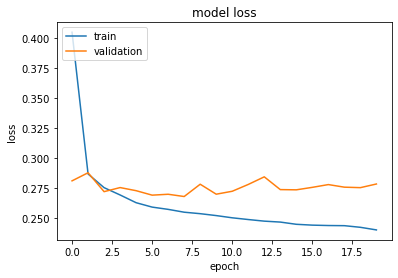

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

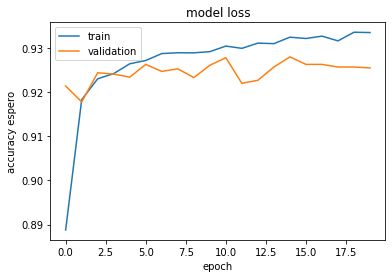

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('accuracy espero')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

## 3.- Model save and load
As many DL models needs some time to be trained, it is usefull to be able to keep the weights or even the whole model
#### Weights save

In [28]:
model.save_weights('../models/mnistconv.h5')

#### Model save

In [29]:
model.save ('../models/modeloentero.h5')

#### Weight load

In [30]:
model.load_weights ('../models/mnistconv.h5')

#### Model load

In [19]:
from tensorflow.keras.models import load_model
# whole model load
model2 = load_model ('../models/modeloentero.h5')


In [20]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 28, 24)        48        
_________________________________________________________________
flatten (Flatten)            (None, 18816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                188170    
Total params: 188,218
Trainable params: 188,218
Non-trainable params: 0
_________________________________________________________________


In [33]:
# if it only has the weights, it fails
# model3.load_weights ('mnistconv.h5')
model3 = load_model ('../models/mnistconv.h5')


ValueError: No model found in config file.